In [2]:
import pandas as pd
import os
import numpy as np
print(os.path.abspath('../'))

C:\Users\dell 2\Desktop\CDA


In [3]:
file_path = os.path.abspath('C:\\Users\\dell 2\\Desktop\\CDA\\ML\\Assignment')
print(file_path)

C:\Users\dell 2\Desktop\CDA\ML\Assignment


In [4]:
bank = pd.read_csv(file_path+'/bank-full.csv', ';')

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
bank_1 = bank.copy()

In [9]:
bank_1['job'] = bank_1['job'].replace('admin.','admin')

In [10]:
bank_1['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [11]:
#bank_2 = pd.get_dummies(bank_1)
#bank_2.head()

In [12]:
# Preprocessing - Divide the data set into a feature set and corresponding labels. 
X = bank_1.drop('y', 1)
y = bank_1['y']

In [13]:
# One Hot Encoding
X = pd.get_dummies(X)
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Training Set and Test Set

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Performance Evaluation

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[7739  241]
 [ 662  401]]
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7980
         yes       0.62      0.38      0.47      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

0.9001437576025655


### Visualization

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
features = X.columns

In [35]:
importances = model.feature_importances_
indices = np.argsort(importances)

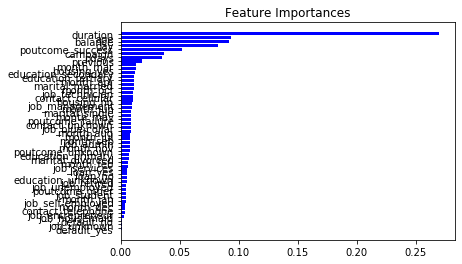

In [36]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b',  align = 'center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

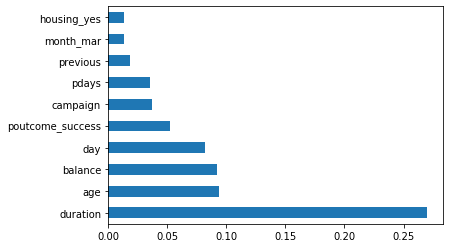

In [37]:
# Top 10 important features

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')